In [1]:
###################################################################
# Poker Project Assignment 1 by Pantourakis Michail
#
# All code blocks can be executed either serially or independently.
# Some data required for proper execution are automatically exported
# to .json files (e.g. state space files, pretrained models). 
# Note that the generated files are also provided for your convenience
# (e.g. further training/analysis, playing against agents).
###################################################################

from game import Game
import json
from env import Env
from random_agent import RandomAgent
from threshold_agent import ThresholdAgent
from policy_iteration_agent import PolicyIterationAgent
import time
start_time = time.time()

''' Calculate card probabilities which affect state transition probabilities for Policy Iteration's required state space
'''

[ win_probabilities, loss_probabilities, flop_probabilities, range_probabilities ] = Game.get_transition_probabilities_for_cards()

with open('flop_probabilities.json', 'w') as json_file:
    json.dump(flop_probabilities, json_file, indent=4)

with open('loss_probabilities.json', 'w') as json_file:
    json.dump(loss_probabilities, json_file, indent=4)

with open('win_probabilities.json', 'w') as json_file:
    json.dump(win_probabilities, json_file, indent=4)

with open('range_probabilities.json', 'w') as json_file:
    json.dump(range_probabilities, json_file, indent=4)

''' State space calculation for Policy Iteration vs Random and Threshold Agents
'''

env = Env()
random_agent = RandomAgent(env.np_random, True)
threshold_agent = ThresholdAgent(True)

state_space = threshold_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Threshold Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open('threshold_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

state_space = random_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Random Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open('random_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

''' Get optimal policies for Random and Threshold Agents using Policy Iteration
'''

print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent)

with open('random_agent_optimal_policy.json', "w") as write_file:
    json.dump(pi_random_agent.P_opt, write_file, indent=4, sort_keys=True)

with open('threshold_agent_optimal_policy.json', "w") as write_file:
    json.dump(pi_threshold_agent.P_opt, write_file, indent=4, sort_keys=True)

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Threshold Agent:
len(state_space) =  2075
len(state_space[]) =  4500
Random Agent:
len(state_space) =  1000
len(state_space[]) =  2230
Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Total time elapsed for code snippet:  61.97567129135132  seconds


In [2]:
''' Policy Iteration Algorithm vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy
start_time = time.time()

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent) # WARNING: This class loads state space files created by first block.
env.set_agents([
    pi_random_agent,
    random_agent,
])

num_of_games = 10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('pi_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running  100000  games "Policy Iteration Agent vs Random Agent"...
Progress (%)
100.0   
Average payoffs:   0.877385
Standard deviation:   2.126336770545767
Stored results successfully!
Total time elapsed for code snippet:  20.339057445526123  seconds


In [3]:
''' Threshold Agent vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy
start_time = time.time()

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
threshold_agent = ThresholdAgent(False, agent_model_is_known = False)
env.set_agents([
    threshold_agent,
    random_agent,
])

num_of_games = 10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Threshold Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('threshold_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running  100000  games "Threshold Agent vs Random Agent"...
Progress (%)
100.0 
Average payoffs:   0.3101
Standard deviation:   1.6503493539247986
Stored results successfully!
Total time elapsed for code snippet:  19.767488479614258  seconds


In [4]:
''' Policy Iteration Algorithm vs Threshold Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from threshold_agent import ThresholdAgent
import json
import time
start_time = time.time()

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False, agent_model_is_known = True)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent) # WARNING: This class loads state space files created by first block.
env.set_agents([
    pi_threshold_agent,
    threshold_agent,
])

num_of_games = 10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('pi_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Running  100000  games "Policy Iteration Agent vs Threshold Agent"...
Progress (%)
100.0   
Average payoffs:   0.22731
Standard deviation:   1.4702364312926
Stored results successfully!
Total time elapsed for code snippet:  19.8765230178833  seconds


In [5]:
''' Training Q Learning Algorithm vs Threshold Agent & Analyzing Hyperparameters
'''

from env import Env
from q_learning_agent import QLearningAgent
from threshold_agent import ThresholdAgent
import json
import time
import numpy as npy


start_time = time.time()

initial_epsilon_values = [1.0, 0.1, 0.01, 0.1]
initial_alpha_values = [1.0, 0.1, 0.1, 0.1]
epsilon_decay_values = [-1/4, -2/3, -2/3, -2/3]
alpha_decay_values = [-1/4, -2/3, -1/4, -1/4]
hyperparam_set_name = ['q_high_varying', 'q_faster_alpha', 'q_low_epsilon', 'q_low_varying']
test_average_payoffs = [0.0, 0.0, 0.0, 0.0]
test_std_payoffs = [0.0, 0.0, 0.0, 0.0]

with open('random_agent_state_space.json') as json_file:
    unknown_agent_state_space = json.load(json_file)

print("Tuning Q Learning algorithm for Threshold Agent...")
for hyp_ind in range(len(initial_alpha_values)):
    # Make environment
    env = Env()
    threshold_agent = ThresholdAgent(False, agent_model_is_known = False)
    q_learning_agent = QLearningAgent(
        env.np_random, 
        False, 
        is_learning = True, 
        initial_epsilon = initial_epsilon_values[hyp_ind], 
        initial_alpha = initial_alpha_values[hyp_ind], 
        epsilon_decay = epsilon_decay_values[hyp_ind], 
        alpha_decay = alpha_decay_values[hyp_ind],
        state_space = unknown_agent_state_space
    )
    env.set_agents([
        q_learning_agent,
        threshold_agent,
    ])

    agent_payoffs = []
    num_of_games = 3*10**6
    print("Training session for hyperparameter set: ", hyperparam_set_name[hyp_ind])
    print("Progress (%)")
    for i in range(num_of_games):
        print(round(i/num_of_games*100, 1),"\r", end="")

        trajectories, payoffs = env.run()
        agent_payoffs.append(payoffs[0])

    print("Storing instance...")

    with open(hyperparam_set_name[hyp_ind] + '_threshold_model.json', 'w') as json_file:
        json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

    with open(hyperparam_set_name[hyp_ind] + '_threshold_payoffs_train.json', 'w') as json_file:
        json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)


    q_learning_agent.is_learning = False
    
    agent_payoffs = []
    num_of_games = 10**6
    print("Testing session number for hyperparameter set: ", hyperparam_set_name[hyp_ind])
    print("Progress (%)")
    for i in range(num_of_games):
        print(round(i/num_of_games*100, 1),"\r", end="")

        trajectories, payoffs = env.run()
        agent_payoffs.append(payoffs[0])


    print("Storing instance...")

    with open(hyperparam_set_name[hyp_ind] + '_threshold_payoffs_test.json', 'w') as json_file:
        json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)
    
    test_average_payoffs[hyp_ind] = npy.mean(agent_payoffs)
    test_std_payoffs[hyp_ind] = npy.std(agent_payoffs)
    print("Testing average payoffs for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", test_average_payoffs[hyp_ind])
    print("Testing standard deviation for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", test_std_payoffs[hyp_ind])

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Tuning Q Learning algorithm for Threshold Agent...
Training session for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_high_varying :  0.125205
Testing standard deviation for hyperparameter set  q_high_varying :  0.9993679042149592
Training session for hyperparameter set:  q_faster_alpha
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_faster_alpha
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_faster_alpha :  -0.17127
Testing standard deviation for hyperparameter set  q_faster_alpha :  2.0047746973413245
Training session for hyperparameter set:  q_low_epsilon
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_low_epsilon
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_low_epsilon :  -0

In [6]:
''' Training Q Learning Algorithm vs Random Agent & Analyzing Hyperparameters
'''

from env import Env
from q_learning_agent import QLearningAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy


start_time = time.time()

initial_epsilon_values = [1.0, 1.0, 1.0, 0.1]
initial_alpha_values = [1.0, 1.0, 1.0, 0.1]
epsilon_decay_values = [-1/4, -1/4, -1/8, -2/3]
alpha_decay_values = [-1/4, -1/8, -1/4, -1/4]
hyperparam_set_name = ['q_high_varying', 'q_slower_alpha', 'q_slower_epsilon', 'q_low_varying']
test_average_payoffs = [0.0, 0.0, 0.0, 0.0]
test_std_payoffs = [0.0, 0.0, 0.0, 0.0]

with open('random_agent_state_space.json') as json_file:
    unknown_agent_state_space = json.load(json_file)

## File that includes optimal policy for Random Agent by Policy Iteration algorithm, created by first code block
print("Loading Optimal Policy for Random Agent...")
with open('random_agent_optimal_policy.json') as json_file:
    random_optimal_policy = json.load(json_file)

print("Tuning Q Learning algorithm for Random Agent...")
for hyp_ind in range(len(initial_alpha_values)):
    # Make environment
    env = Env()
    random_agent = RandomAgent(env.np_random, False)
    q_learning_agent = QLearningAgent(
        env.np_random, 
        False, 
        is_learning = True, 
        initial_epsilon = initial_epsilon_values[hyp_ind], 
        initial_alpha = initial_alpha_values[hyp_ind], 
        epsilon_decay = epsilon_decay_values[hyp_ind], 
        alpha_decay = alpha_decay_values[hyp_ind],
        state_space = unknown_agent_state_space
    )
    env.set_agents([
        q_learning_agent,
        random_agent,
    ])

    agent_payoffs = []
    num_of_games = 3*10**6
    q_policy_evolution = []
    print("Training session for hyperparameter set: ", hyperparam_set_name[hyp_ind])
    print("Progress (%)")
    for i in range(num_of_games):
        print(round(i/num_of_games*100, 1),"\r", end="")
        trajectories, payoffs = env.run()
        agent_payoffs.append(payoffs[0])
        counter = 0
        for state_key in q_learning_agent.model['policy']:
            if q_learning_agent.model['policy'][state_key] == random_optimal_policy[state_key]:
                counter += 1
        q_policy_evolution.append(round(100*counter/len(random_optimal_policy), 2))

    print("Storing instance...")

    with open(hyperparam_set_name[hyp_ind] + '_random_model.json', 'w') as json_file:
        json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

    with open(hyperparam_set_name[hyp_ind] + '_random_payoffs_train.json', 'w') as json_file:
        json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

    with open(hyperparam_set_name[hyp_ind] + '_random_policy_evolution.json', 'w') as json_file:
        json.dump(q_policy_evolution, json_file, indent=4, sort_keys=True)


    q_learning_agent.is_learning = False
    
    agent_payoffs = []
    num_of_games = 10**6
    print("Testing session number for hyperparameter set: ", hyperparam_set_name[hyp_ind])
    print("Progress (%)")
    for i in range(num_of_games):
        print(round(i/num_of_games*100, 1),"\r", end="")

        trajectories, payoffs = env.run()
        agent_payoffs.append(payoffs[0])


    print("Storing instance...")

    with open(hyperparam_set_name[hyp_ind] + '_random_payoffs_test.json', 'w') as json_file:
        json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)
    
    test_average_payoffs[hyp_ind] = npy.mean(agent_payoffs)
    test_std_payoffs[hyp_ind] = npy.std(agent_payoffs)
    print("Testing average payoffs for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", test_average_payoffs[hyp_ind])
    print("Testing standard deviation for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", test_std_payoffs[hyp_ind])

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Loading Optimal Policy for Random Agent...
Tuning Q Learning algorithm for Random Agent...
Training session for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_high_varying :  0.803505
Testing standard deviation for hyperparameter set  q_high_varying :  2.0779574622631234
Training session for hyperparameter set:  q_slower_alpha
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_slower_alpha
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_slower_alpha :  0.403085
Testing standard deviation for hyperparameter set  q_slower_alpha :  1.6216334304567723
Training session for hyperparameter set:  q_slower_epsilon
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_slower_epsilon
Progress (%)
Storing instance...
Testing average payof

In [32]:
###########################################################
# Figure Utilities
###########################################################

import matplotlib.pyplot as plt
from utils import get_moving_average
import json
import os
from IPython import display
import time
start_time = time.time()

SAVE_FIGURES = True # save figures for latex
DISPLAY_FIGURES = True # display figures in notebook
saved_figures = []

class Figure:
    def __init__(self, title, xlabel, ylabel, x, ys, legends, filename):
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for y in ys:
            plt.plot(x,y)
        plt.legend(legends, loc = "best", frameon = False)
        self.filename = filename
        self.save_figure_or_continue()
    def save_figure_or_continue(self):
        plt.show
        if DISPLAY_FIGURES: 
            plt.savefig(self.filename + ".png", bbox_inches = "tight")
            saved_figures.append(self.filename + ".png")
        if SAVE_FIGURES: plt.savefig("../latex/figures/" + self.filename + ".png", bbox_inches = "tight")
        plt.close()

def display_figures():
    """ A utility to display saved figures inside this notebook
    """
    filelist=os.listdir()
    for file in saved_figures:
        display.display(display.Image(file))

def delete_figures():
    """ A utility to delete saved figures
    """
    for file in saved_figures:
        os.remove(file)

In [33]:
###########################################################
# Figure generation
###########################################################


hyperparam_set_name = ['q_high_varying', 'q_slower_alpha', 'q_slower_epsilon', 'q_low_varying']

with open('q_high_varying_random_policy_evolution.json') as json_file:
    q_high_varying_policy_evolution = json.load(json_file)

with open('q_slower_alpha_random_policy_evolution.json') as json_file:
    q_slower_alpha_policy_evolution = json.load(json_file)

with open('q_slower_epsilon_random_policy_evolution.json') as json_file:
    q_slower_epsilon_policy_evolution = json.load(json_file)

with open('q_low_varying_random_policy_evolution.json') as json_file:
    q_low_varying_policy_evolution = json.load(json_file)

    
num_of_games = len(q_high_varying_policy_evolution) # <---- num_of_games of blocks above should be the same for all experiments in order for this code to finish figures successfully

Figure(
    title = "Q Learning Policy Convergence Rate vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Same policy per state (%)",
    x = range(1,num_of_games+1),
    ys = [q_high_varying_policy_evolution, q_slower_alpha_policy_evolution, q_slower_epsilon_policy_evolution, q_low_varying_policy_evolution],
    legends = tuple(hyperparam_set_name),
    filename = "convergence_rate"
)

window_size = int(num_of_games/10)  # <---- CHANGE WINDOW SIZE HERE

print("Calculating q_random_moving_averages...")

with open('q_high_varying_random_payoffs_train.json') as json_file:
    q_high_varying_random_payoffs = json.load(json_file)

with open('q_slower_alpha_random_payoffs_train.json') as json_file:
    q_slower_alpha_random_payoffs = json.load(json_file)

with open('q_slower_epsilon_random_payoffs_train.json') as json_file:
    q_slower_epsilon_random_payoffs = json.load(json_file)

with open('q_low_varying_random_payoffs_train.json') as json_file:
    q_low_varying_random_payoffs = json.load(json_file)

q_high_varying_random_moving_averages = get_moving_average(q_high_varying_random_payoffs, window_size)
q_slower_alpha_random_moving_averages = get_moving_average(q_slower_alpha_random_payoffs, window_size)
q_slower_epsilon_random_moving_averages = get_moving_average(q_slower_epsilon_random_payoffs, window_size)
q_low_varying_random_moving_averages = get_moving_average(q_low_varying_random_payoffs, window_size)

with open('pi_random_payoffs.json') as json_file:
    pi_random_payoffs = json.load(json_file)

random_optimal_mean = sum(pi_random_payoffs)/len(pi_random_payoffs)

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(q_high_varying_random_moving_averages)+window_size),
    ys = [q_high_varying_random_moving_averages, q_slower_alpha_random_moving_averages, q_slower_epsilon_random_moving_averages, q_low_varying_random_moving_averages, [random_optimal_mean]*len(q_high_varying_random_moving_averages)],
    legends = ('q_high_varying', 'q_slower_alpha', 'q_slower_epsilon', 'q_low_varying', "mean optimal"),
    filename = "moving_averages_random"
)

hyperparam_set_name = ['q_high_varying', 'q_faster_alpha', 'q_low_epsilon', 'q_low_varying']

print("Calculating q_threshold_moving_averages...")

with open('q_high_varying_threshold_payoffs_train.json') as json_file:
    q_high_varying_threshold_payoffs = json.load(json_file)

with open('q_faster_alpha_threshold_payoffs_train.json') as json_file:
    q_faster_alpha_threshold_payoffs = json.load(json_file)

with open('q_low_epsilon_threshold_payoffs_train.json') as json_file:
    q_low_epsilon_threshold_payoffs = json.load(json_file)

with open('q_low_varying_threshold_payoffs_train.json') as json_file:
    q_low_varying_threshold_payoffs = json.load(json_file)

q_high_varying_threshold_moving_averages = get_moving_average(q_high_varying_threshold_payoffs, window_size)
q_faster_alpha_threshold_moving_averages = get_moving_average(q_faster_alpha_threshold_payoffs, window_size)
q_low_epsilon_threshold_moving_averages = get_moving_average(q_low_epsilon_threshold_payoffs, window_size)
q_low_varying_threshold_moving_averages = get_moving_average(q_low_varying_threshold_payoffs, window_size)

with open('pi_threshold_payoffs.json') as json_file:
    pi_threshold_payoffs = json.load(json_file)

threshold_optimal_mean = sum(pi_threshold_payoffs)/len(pi_threshold_payoffs)

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Threshold Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(q_high_varying_threshold_moving_averages)+window_size),
    ys = [q_high_varying_threshold_moving_averages, q_faster_alpha_threshold_moving_averages, q_low_epsilon_threshold_moving_averages, q_low_varying_threshold_moving_averages, [threshold_optimal_mean]*len(q_high_varying_threshold_moving_averages)],
    legends = ('q_high_varying', 'q_faster_alpha', 'q_low_epsilon', 'q_low_varying', 'mean optimal'),
    filename = "moving_averages_threshold"
)

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Calculating q_random_moving_averages...
Calculating q_threshold_moving_averages...
Total time elapsed for code snippet:  28.9616219997406  seconds


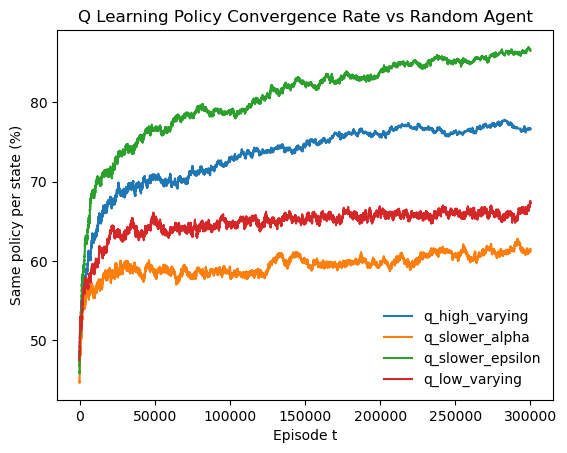

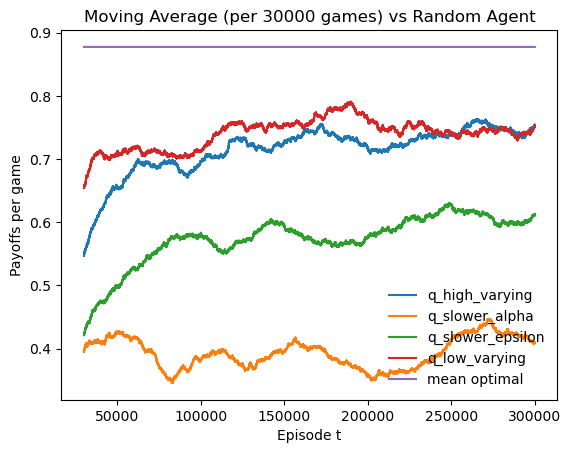

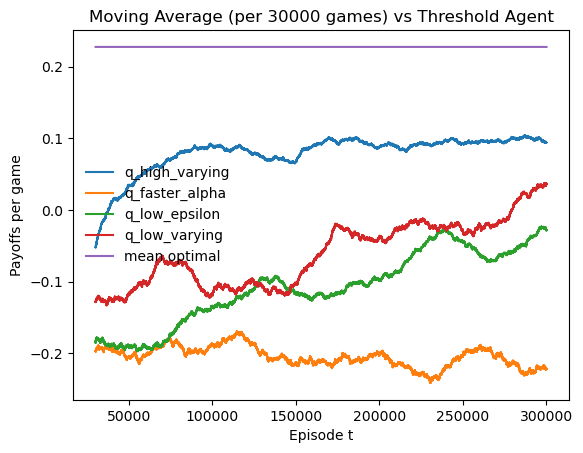

In [34]:
###########################################################
# Load generated figures & clean folder
###########################################################

if DISPLAY_FIGURES: 
    display_figures()
    delete_figures()